#### Many thanks to the authors of these tutorials: 
- https://medium.com/analytics-vidhya/create-your-own-coefficient-plot-function-in-python-aadb9fe27a77

- https://zhiyzuo.github.io/Python-Plot-Regression-Coefficient/ 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm 

In [3]:
df=sns.load_dataset('tips')

In [5]:
df1=df.copy()
df1.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [32]:
model=smf.ols(formula='tip ~ total_bill + C(sex)', data=df1)
results=model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     101.3
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.18e-32
Time:                        00:40:01   Log-Likelihood:                -350.52
No. Observations:                 244   AIC:                             707.0
Df Residuals:                     241   BIC:                             717.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9067      0.175      5.182      0.000       0.562       1.251
C(sex)[T.Female]     0.0266      0.138      0.192      0.848      -0.246       0.299
total_bill           0.1052      0.007     14.110      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.499   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.652
Skew:                           0.447   Prob(JB):                     4.05e-09
Kurtosis:                       4.733   Cond. No.                         63.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
print(f"MSE: {results.mse_resid}")

MSE: 1.0487549416929969


In [70]:
# Define function to output plot of the model coefficients

def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['Intercept'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")
    
    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=12, 
                 ecolor='green',capsize=10,
                 yerr='errors', legend=False)
    
    # Set title & labels
    plt.title('Coefficient Plot (OLS)',fontsize=14)
    ax.set_ylabel('Coefficients',fontsize=12)
    ax.set_xlabel('',fontsize=12)
    
    # Coefficients
    ax.scatter(x=np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='green')
    
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='black', linewidth=2)
   
    return plt.show()

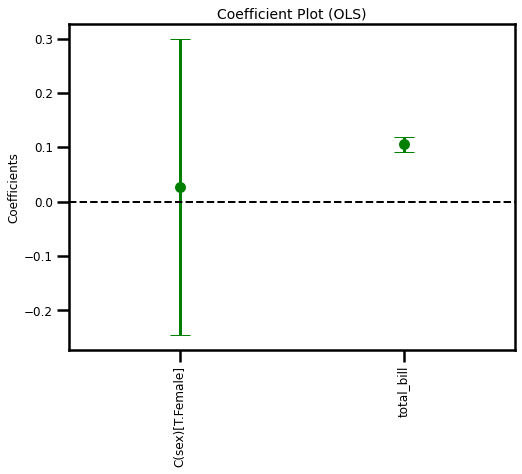

In [71]:
coefplot(results);